In [ ]:
# TASK 1

import numpy as np
import pandas as pd
import math

# Step (a): Document-Term Matrix Weighted by Term-Frequency (TF)
terms = ["how", "do", "you", "are", "feel"]
documents = [
    ["how", "do", "you", "do"],
    ["how", "are", "you"],
    ["how", "do", "you", "feel"]
]

# Calculate Term Frequency (TF)
def calculate_tf(doc, term):
    return doc.count(term) / len(doc)

tf_matrix = []
for doc in documents:
    tf_matrix.append([calculate_tf(doc, term) for term in terms])

# Convert TF Matrix to DataFrame
tf_df = pd.DataFrame(tf_matrix, columns=terms, index=["Document 1", "Document 2", "Document 3"])

# Step (b): Inverse Document Frequency (IDF)
N = len(documents)
df = [sum([1 for doc in documents if term in doc]) for term in terms]
idf = [math.log(N / df_i) if df_i > 0 else 0 for df_i in df]

idf_df = pd.DataFrame({"Term": terms, "IDF": idf})

# Step (c): TF-IDF Matrix
tf_idf_matrix = np.array(tf_matrix) * np.array(idf)
tf_idf_df = pd.DataFrame(tf_idf_matrix, columns=terms, index=["Document 1", "Document 2", "Document 3"])

# Step (d): Most Important Word
most_important_word = tf_idf_df.max(axis=1).idxmax()
most_important_term = tf_idf_df.stack().idxmax()[1]

# Output Results
print("1. Consider the following short documents:\nDocument 1: how do you do\nDocument 2: how are you\nDocument 3: how do you feel")
print("\na. Show the Document-Term matrix weighted by Term-frequency (Tf). This is partially complete")
print(tf_df)
print("\nb. What is the inverse document frequency (Idf) of each word?")
print(idf_df)
print("\nc. Show the Document-Term matrix weighted by Tf-Idf for this dataset.")
print(tf_idf_df)
print(f"\nd. Which word is the most “important” for comparing these documents based on Tf-idf?\nThe most important word for comparing these documents based on TF-IDF is '{most_important_term}'.")


1. Consider the following short documents:
Document 1: how do you do
Document 2: how are you
Document 3: how do you feel

a. Show the Document-Term matrix weighted by Term-frequency (Tf). This is partially complete
                 how    do       you       are  feel
Document 1  0.250000  0.50  0.250000  0.000000  0.00
Document 2  0.333333  0.00  0.333333  0.333333  0.00
Document 3  0.250000  0.25  0.250000  0.000000  0.25

b. What is the inverse document frequency (Idf) of each word?
   Term       IDF
0   how  0.000000
1    do  0.405465
2   you  0.000000
3   are  1.098612
4  feel  1.098612

c. Show the Document-Term matrix weighted by Tf-Idf for this dataset.
            how        do  you       are      feel
Document 1  0.0  0.202733  0.0  0.000000  0.000000
Document 2  0.0  0.000000  0.0  0.366204  0.000000
Document 3  0.0  0.101366  0.0  0.000000  0.274653

d. Which word is the most “important” for comparing these documents based on Tf-idf?
The most important word for comparing the

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Download the CSV file on Canvas called airline_tweets_sentiment_utf8.csv that contains tweets about airlines. The goal is to create a word cloud from the most frequent words in the “tweet” column after some pre-processing. Write Python code to do the following tasks (please refer to the text processing Python code used in class on GitHub). You must use the nltk and wordcloud packages (and not any other text processing package).

a. Load the given CSV file. [code]
airline_tweets_sentiment_utf8.csv

b. What is the full text of the first tweet? 
@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.

c. Convert your data to the “tidy” format, i.e., one word per row. (Hint: use nltk.tokenize.TweetTokenizer and pandas.DataFrame.explode.) How many words are there? [code, number of words]
293537

d. Remove stop words from the tidy dataset. How many words are there? [code, number of words]
187919

e. Calculate the word count for e

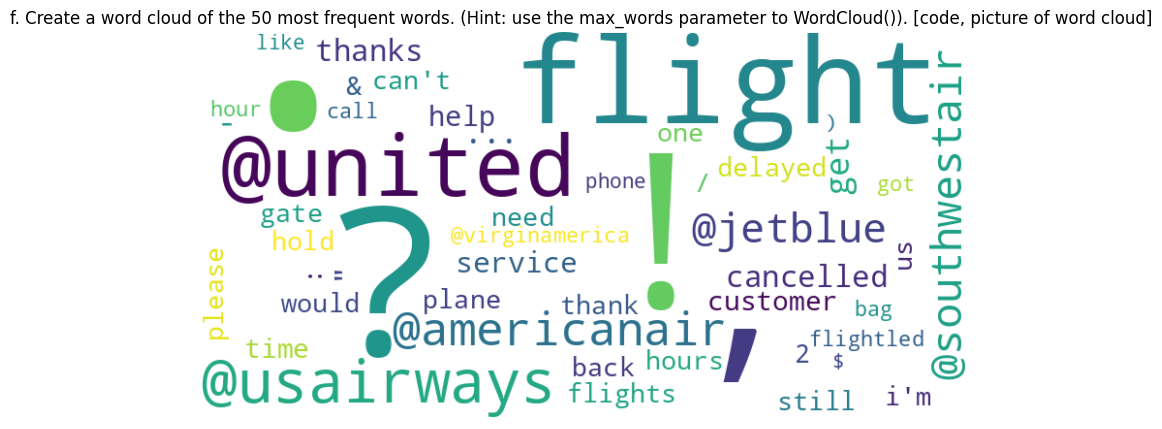

In [ ]:
# TASK 2

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK stop words
nltk.download('stopwords')

print("2. Download the CSV file on Canvas called airline_tweets_sentiment_utf8.csv that contains tweets about airlines. The goal is to create a word cloud from the most frequent words in the “tweet” column after some pre-processing. Write Python code to do the following tasks (please refer to the text processing Python code used in class on GitHub). You must use the nltk and wordcloud packages (and not any other text processing package).")

# Step (a): Load the CSV file
file_path = "airline_tweets_sentiment_utf8.csv"  # Replace with your file path
data = pd.read_csv(file_path)
print("\na. Load the given CSV file. [code]")
print(file_path)

# Step (b): Full text of the first tweet
first_tweet = data['tweet'].iloc[0]
print("\nb. What is the full text of the first tweet? ")
print(first_tweet)

# Step (c): Convert data to tidy format (one word per row)
tweet_tokenizer = TweetTokenizer()
data['tokenized_tweet'] = data['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
tidy_data = data[['tokenized_tweet']].explode('tokenized_tweet')
tidy_data = tidy_data.rename(columns={"tokenized_tweet": "word"})
total_words = len(tidy_data)
print(f"\nc. Convert your data to the “tidy” format, i.e., one word per row. (Hint: use nltk.tokenize.TweetTokenizer and pandas.DataFrame.explode.) How many words are there? [code, number of words]\n{total_words}")

# Step (d): Remove stop words
stop_words = set(stopwords.words('english'))
tidy_data = tidy_data[~tidy_data['word'].str.lower().isin(stop_words)]
words_after_stopword_removal = len(tidy_data)
print(f"\nd. Remove stop words from the tidy dataset. How many words are there? [code, number of words]\n{words_after_stopword_removal}")

# Step (e): Word count and most frequent words
word_counts = tidy_data['word'].str.lower().value_counts()
unique_words = len(word_counts)
top_10_words = word_counts.head(10)
print(f"\ne. Calculate the word count for each word and sort them with the most frequent words first. How many unique words are there?\n{unique_words}")
print("What are the 10 most frequent words with counts? [code, list of 10 word-counts]")
print(top_10_words)

# Step (f): Create a word cloud of the 50 most frequent words
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("f. Create a word cloud of the 50 most frequent words. (Hint: use the max_words parameter to WordCloud()). [code, picture of word cloud]")
plt.show()


In [ ]:
# TASK 3

from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import normalize

print("3. Compute the cosine similarity between vectors (1, 2, 3) and (0, 2, 5).")

# Define the vectors
vector_a = np.array([1, 2, 3])
vector_b = np.array([0, 2, 5])

# Step (a): Using scipy.spatial.distance.cosine()
cosine_dist = cosine(vector_a, vector_b)  # scipy expects 1-D vectors
cosine_sim_scipy = 1 - cosine_dist
print(f"\na. Use scipy.spatial.distance.cosine()\n{cosine_sim_scipy}")

# Step (b): Using sklearn.metrics.pairwise.cosine_similarity()
vector_a_2d = vector_a.reshape(1, -1)
vector_b_2d = vector_b.reshape(1, -1)
cosine_sim_sklearn = cosine_similarity(vector_a_2d, vector_b_2d)
print(f"\nb. Use sklearn.metrics.pairwise.cosine_similarity()\n{cosine_sim_sklearn[0][0]}")

# Step (c): Using sklearn.metrics.pairwise.linear_kernel() and sklearn.preprocessing.normalize()
# Normalize the vectors
normalized_a = normalize(vector_a_2d, norm='l2')
normalized_b = normalize(vector_b_2d, norm='l2')

# Compute cosine similarity using linear_kernel
cosine_sim_linear_kernel = linear_kernel(normalized_a, normalized_b)
print(f"\nc. Use sklearn.metrics.pairwise.linear_kernel() and sklearn.preprocessing.normalize()\n{cosine_sim_linear_kernel[0][0]}")


3. Compute the cosine similarity between vectors (1, 2, 3) and (0, 2, 5).

a. Use scipy.spatial.distance.cosine()
0.9429541672723837

b. Use sklearn.metrics.pairwise.cosine_similarity()
0.9429541672723838

c. Use sklearn.metrics.pairwise.linear_kernel() and sklearn.preprocessing.normalize()
0.9429541672723838


In [ ]:
# TASK 4

from sklearn.feature_extraction.text import TfidfVectorizer

print("4. Use the same CSV file from Problem 2. Each tweet also has an associated “sentiment” - whether the expressed opinion in the tweet is positive, negative, or neutral. The goal is to use this data to predict the sentiment of the first tweet. Write Python code to do the following tasks:")

# Step (a): Load the data and calculate the TF-IDF weights
file_path = "airline_tweets_sentiment_utf8.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure the tweet_id is correctly loaded and cast tweet_id as str
data['tweet_id'] = data['tweet_id'].astype(str)

# Check for missing tweets and drop rows with NaN in the tweet column
data = data.dropna(subset=['tweet'])

# First tweet ID to analyze
first_tweet_id = "567591480085463000"

# Ensure the first tweet exists in the dataset
if first_tweet_id not in data['tweet_id'].values:
    raise ValueError(f"Tweet ID {first_tweet_id} not found in the dataset!")

first_tweet_row = data[data["tweet_id"] == first_tweet_id].iloc[0]

# Task (a): Calculate the TF-IDF weights
vectorizer = TfidfVectorizer(stop_words='english')

# Preprocessing: Ensure all tweets are strings
data['tweet'] = data['tweet'].astype(str)

# Calculate TF-IDF for ALL TWEETS TOGETHER
tfidf_matrix = vectorizer.fit_transform(data['tweet'])

# Create DataFrame with TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=data['tweet_id'])

# Check if all tweets have the same shape
print("\na. Calculate the tf-idf weight for each word and tweet_id. [code]")
print(tfidf_df.shape)  # (number of tweets, number of unique words)
print(tfidf_df.head())

# Step (b): How many unique words are present?
unique_words = len(vectorizer.get_feature_names_out())
print(f"\nb. How many unique words are present? [code]\n{unique_words}")

# Step (c): Predict sentiment of the first tweet using 1-Nearest Neighbor with cosine similarity
# Get the TF-IDF vector for the first tweet
first_tweet_vector = np.array(tfidf_df.loc[first_tweet_id]).ravel()  # Force 1-D array

# Compute cosine similarity with other tweets
similarities = {}
for tweet_id in tfidf_df.index:
    if tweet_id != first_tweet_id:  # Exclude the first tweet itself
        other_tweet_vector = np.array(tfidf_df.loc[tweet_id]).ravel()  # Force 1-D array

        # Check if the vectors are non-empty and have the same shape
        if first_tweet_vector.shape == other_tweet_vector.shape and np.linalg.norm(first_tweet_vector) > 0 and np.linalg.norm(other_tweet_vector) > 0:
            similarity = 1 - cosine(first_tweet_vector, other_tweet_vector)  # Cosine similarity
            similarities[tweet_id] = similarity

# Find the most similar tweet
most_similar_tweet_id = max(similarities, key=similarities.get)
most_similar_tweet_row = data[data['tweet_id'] == most_similar_tweet_id].iloc[0]
predicted_sentiment = most_similar_tweet_row['airline_sentiment']

# Output the results
print("\nc. Predict the sentiment of the first tweet (with tweet_id = “567591480085463000”) using the 1-Nearest Neighbor approach with cosine similarity.")
print("Write code to compare the tf-idf vector of the first tweet to that of the remaining tweets using the cossim function from Problem 3. The sentiment of the tweet with the highest similarity will then be the predicted sentiment. [code]")
print(f"What is the tweet_id of the most similar tweet(s)?\n{most_similar_tweet_id}")
print(f"What is the text of this tweet(s)?\n{most_similar_tweet_row['tweet']}")
print(f"What is its sentiment (this is the predicted sentiment)?\n{predicted_sentiment}")
print(f"Does the predicted sentiment match its known sentiment (from row 1)?\n{'Yes' if predicted_sentiment == first_tweet_row['airline_sentiment'] else 'No'}")

# Step (d): Explanation of Bag-of-Words Approach
explanation = """
The Bag-of-Words approach has limitations for sentiment analysis. It treats words as independent features and ignores word order and context, which are often critical for understanding sentiment.
For example, negations like 'not good' may be misinterpreted as positive. More advanced techniques, like word embeddings or deep learning models, generally perform better for sentiment analysis.
"""
print("\nd. Is this bag-of-words approach in general a good way to predict sentiment in tweets? Why or why not? Answer in 2-3 sentences.")
print(explanation)


4. Use the same CSV file from Problem 2. Each tweet also has an associated “sentiment” - whether the expressed opinion in the tweet is positive, negative, or neutral. The goal is to use this data to predict the sentiment of the first tweet. Write Python code to do the following tasks:

a. Calculate the tf-idf weight for each word and tweet_id. [code]
(14640, 14788)
                     00  000  000114  000419  000ft  000lbs  0011  0016  00a  \
tweet_id                                                                       
567591480085463000  0.0  0.0     0.0     0.0    0.0     0.0   0.0   0.0  0.0   
567588278875213000  0.0  0.0     0.0     0.0    0.0     0.0   0.0   0.0  0.0   
567590027375702000  0.0  0.0     0.0     0.0    0.0     0.0   0.0   0.0  0.0   
567592368451248000  0.0  0.0     0.0     0.0    0.0     0.0   0.0   0.0  0.0   
567594449874587000  0.0  0.0     0.0     0.0    0.0     0.0   0.0   0.0  0.0   

                    00am  ...  zrh_airport  zsdgzydnde  zsuztnaijq  \
t

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>